###Importing Required Libraries

In [305]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###House Price Prediction DataSet

In [306]:
#reading dataframe
df = pd.read_csv('housedata.csv')
df

,price,bedrooms,bathrooms,area,condition
0,313000,3,1.50,1340,3
1,2384000,5,2.50,3650,5
2,342000,3,2.00,1930,4
3,420000,3,2.25,2000,4
4,550000,4,2.50,1940,4
5,490000,2,1.00,880,3
6,335000,2,2.00,1350,3
7,482000,4,2.50,2710,3
8,452500,3,2.50,2430,4
9,640000,4,2.00,1520,3


In [307]:
df.shape  # m = 18 training examples

(18, 5)

##Comparing Price with other features

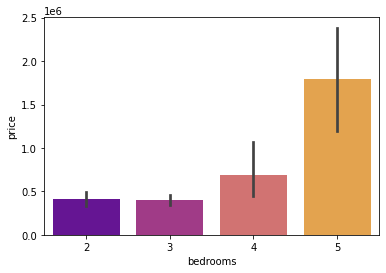

In [308]:
#plot bedrooms vs price
sns.barplot(x ='bedrooms', y ='price', data = df,  
            palette ='plasma')

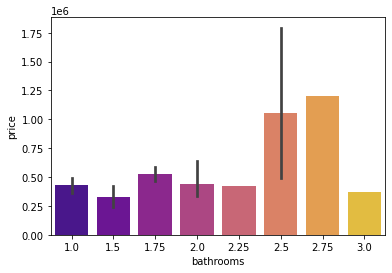

In [309]:
#plot bathrooms vs price
sns.barplot(x ='bathrooms', y ='price', data = df,  
            palette ='plasma')

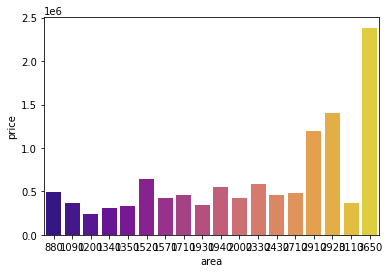

In [310]:
#plot area vs price
sns.barplot(x ='area', y ='price', data = df,  
            palette ='plasma')

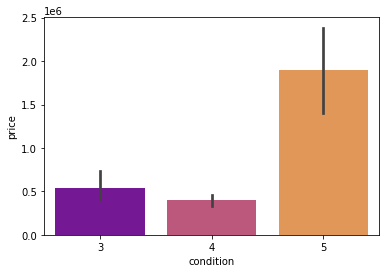

In [311]:
#plot condition vs price
sns.barplot(x ='condition', y ='price', data = df,  
            palette ='plasma')

In [312]:
#extracting values from dataset
x1=df['bedrooms'].values
x2=df['bathrooms'].values
x3=df['area'].values
x4=df['condition'].values
Y = df['price'].values

In [313]:
#normalizing data
x1=x1/max(x1)
x2=x2/max(x2)
x3=x3/max(x3)
x4=x4/max(x4)
Y= Y/max(Y)

In [314]:
#defining prediction function
def predict(b,w1,w2,w3,w4, x1, x2, x3, x4):
    
    y= b+w1*x1+w2*x2+w3*x3+w4*x4
    return y

In [315]:
#defining cost function
def cost_function(x1,x2,x3,x4,Y,b,w1,w2,w3,w4):
    
    m=Y.size
    cost=0
    
    for i in range(m):
        y= predict(b,w1,w2,w3,w4,x1[i],x2[i],x3[i],x4[i])
        cost = cost + (Y[i]-y)**2
    cost = cost/(m*2)
    
    return cost

In [316]:
#calculating cost with randomly initialized weights
cost = cost_function(x1,x2,x3,x4,Y,b=0,w1=1,w2=1,w3=1,w4=1)
cost

2.896799442435112

In [317]:
def grad_descent(x1,x2,x3,x4,Y,lr,iter):
    m=Y.size
    error= []
    
    b=0
    w1=1
    w2=2
    w3=1
    w4=0

    for iteration in range(iter):    
        cost_b=0
        cost_w1=0
        cost_w2=0
        cost_w3=0
        cost_w4=0
        for i in range(m):
            y=predict(b,w1,w2,w3,w4,x1[i],x2[i],x3[i],x4[i])
            cost_b= cost_b+(y-Y[i])
            cost_w1=cost_w1+(y-Y[i])*x1[i]
            cost_w2=cost_w2+(y-Y[i])*x2[i]
            cost_w3=cost_w3+(y-Y[i])*x3[i]
            cost_w4=cost_w4+(y-Y[i])*x4[i]

        b = b - lr*(cost_b/m)
        w1= w1 - lr*(cost_w1/m)
        w2= w2 - lr*(cost_w2/m)
        w3= w3 - lr*(cost_w3/m)
        w4= w4 - lr*(cost_w4/m)

        error.append(cost_function(x1,x2,x3,x4,Y,b,w1,w2,w3,w4))
        if iteration%500 == 0:
            print("Iteration: ", iteration, "Loss: ", error[iteration])
    return error, b, w1, w2, w3, w4

###With different Values of Learning Rates 

In [318]:
#learning_rate= 0.1
iter=10000
lr =0.1
error, b, w1, w2, w3, w4 = grad_descent(x1,x2,x3,x4,Y,lr,iter)

Iteration:  0 Loss:  1.5191976110507894
Iteration:  500 Loss:  0.012918492247909976
Iteration:  1000 Loss:  0.008673083874949132
Iteration:  1500 Loss:  0.007285750084606343
Iteration:  2000 Loss:  0.0067082737751049965
Iteration:  2500 Loss:  0.006425181969318867
Iteration:  3000 Loss:  0.006268786035010786
Iteration:  3500 Loss:  0.006175796398967017
Iteration:  4000 Loss:  0.006118184787584214
Iteration:  4500 Loss:  0.0060816816809718755
Iteration:  5000 Loss:  0.0060582649913886
Iteration:  5500 Loss:  0.006043137561008552
Iteration:  6000 Loss:  0.006033325146462581
Iteration:  6500 Loss:  0.006026944855033283
Iteration:  7000 Loss:  0.00602279012526508
Iteration:  7500 Loss:  0.006020082208832997
Iteration:  8000 Loss:  0.0060183162997958384
Iteration:  8500 Loss:  0.006017164305142762
Iteration:  9000 Loss:  0.006016412638579342
Iteration:  9500 Loss:  0.0060159221174981535


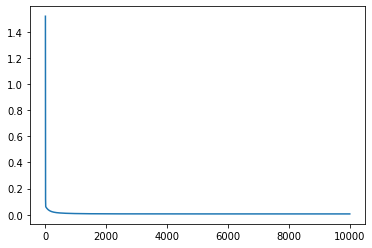

In [319]:
plt.plot(error)

In [320]:
#learning_rate= 0.001
iter=10000
lr =0.001
error, b, w1, w2, w3, w4 = grad_descent(x1,x2,x3,x4,Y,lr,iter)

Iteration:  0 Loss:  2.8523856889375994
Iteration:  500 Loss:  0.23306212100424556
Iteration:  1000 Loss:  0.07206958507630719
Iteration:  1500 Loss:  0.06045954942481927
Iteration:  2000 Loss:  0.058001419721800826
Iteration:  2500 Loss:  0.05617505099178361
Iteration:  3000 Loss:  0.05445949147279058
Iteration:  3500 Loss:  0.052819760120825995
Iteration:  4000 Loss:  0.05125054686886663
Iteration:  4500 Loss:  0.0497484932780144
Iteration:  5000 Loss:  0.048310502022600184
Iteration:  5500 Loss:  0.046933627488953945
Iteration:  6000 Loss:  0.045615062716573535
Iteration:  6500 Loss:  0.04435213249370877
Iteration:  7000 Loss:  0.0431422871157262
Iteration:  7500 Loss:  0.041983096459060905
Iteration:  8000 Loss:  0.0408722443366452
Iteration:  8500 Loss:  0.03980752312032966
Iteration:  9000 Loss:  0.03878682861759642
Iteration:  9500 Loss:  0.03780815519052732


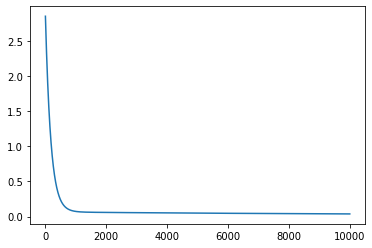

In [321]:
plt.plot(error)

In [322]:
#learning_rate= 0.0001
iter=10000
lr =0.0001
error, b, w1, w2, w3, w4 = grad_descent(x1,x2,x3,x4,Y,lr,iter)

Iteration:  0 Loss:  2.866477034538553
Iteration:  500 Loss:  2.1828068200294113
Iteration:  1000 Loss:  1.6659318417755093
Iteration:  1500 Loss:  1.2751464872081133
Iteration:  2000 Loss:  0.9796792177250973
Iteration:  2500 Loss:  0.7562681895916827
Iteration:  3000 Loss:  0.5873285368369763
Iteration:  3500 Loss:  0.4595669229211324
Iteration:  4000 Loss:  0.36293420665444676
Iteration:  4500 Loss:  0.2898337066624132
Iteration:  5000 Loss:  0.2345226863858085
Iteration:  5500 Loss:  0.19265990475979433
Iteration:  6000 Loss:  0.16096358570839575
Iteration:  6500 Loss:  0.13695285909421598
Iteration:  7000 Loss:  0.1187523021806564
Iteration:  7500 Loss:  0.10494418212759199
Iteration:  8000 Loss:  0.09445675823523064
Iteration:  8500 Loss:  0.08647984366950709
Iteration:  9000 Loss:  0.08040097407937188
Iteration:  9500 Loss:  0.07575715405965873


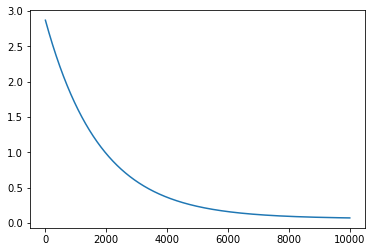

In [323]:
plt.plot(error)